<a href="https://colab.research.google.com/github/VidhyaKishor27/Pythonbasic/blob/main/Miniproject_4_Airports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
ap2=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/Airports2.csv')
ap2['Fly_date']=pd.to_datetime(ap2['Fly_date']) #to_datetime() method converts string to datetime obj
ap2['year']=ap2['Fly_date'].dt.year
print(ap2.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Origin_airport Destination_airport    Origin_city Destination_city  \
0            MHK                 AMW  Manhattan, KS         Ames, IA   
1            EUG                 RDM     Eugene, OR         Bend, OR   
2            EUG                 RDM     Eugene, OR         Bend, OR   

   Passengers  Seats  Flights  Distance   Fly_date  Origin_population  \
0          21     30        1       254 2008-10-01             122049   
1          41    396       22       103 1990-11-01             284093   
2          88    342       19       103 1990-12-01             284093   

   Destination_population  Org_airport_lat  Org_airport_long  \
0                   86219        39.140999        -96.670799   
1                   76034        44.124599       -123.211998   
2                   76034        44.124599       -123.211998   

   Dest_airport_lat  Dest_airpor

Part  2:
1. In the year 2009, print Top 10 cities in the USA that received maximum # inbound flights.
Output:
city,total_inbound_flights,rank


In [3]:
filteredyr=ap2.where(ap2['year']==2009, inplace=False)
inbound=filteredyr.groupby('Destination_city')['Flights'].sum().to_frame('TotalFlights')\
  .reset_index().sort_values(by='TotalFlights',ascending=False)
inbound['rank']=inbound['TotalFlights'].rank(ascending=False)
inbound.columns=['City','Total Destination Flights','Rank']
print(inbound.nlargest(10,'Total Destination Flights'))

                 City  Total Destination Flights  Rank
74        Chicago, IL                   417297.0   1.0
21        Atlanta, GA                   396603.0   2.0
93         Dallas, TX                   316265.0   3.0
263      New York, NY                   278206.0   4.0
167       Houston, TX                   250030.0   5.0
389    Washington, DC                   238744.0   6.0
70      Charlotte, NC                   199700.0   7.0
224   Los Angeles, CA                   192676.0   8.0
98        Detroit, MI                   183655.0   9.0
286  Philadelphia, PA                   181645.0  10.0


2.In the year 2009, print Top 10 cities in the USA that received maximum # outbound flights.
Output:
city,total_outbound_flights,rank


In [4]:
outbound=filteredyr.groupby('Origin_city')['Flights'].sum().to_frame('TotalFlights')\
  .reset_index().sort_values(by='TotalFlights',ascending=False)
outbound['rank']=outbound['TotalFlights'].rank(ascending=False)
outbound.columns=['City','Total Origin Flights','Rank']
print(outbound.nlargest(10,'Total Origin Flights'))

                 City  Total Origin Flights  Rank
74        Chicago, IL              416742.0   1.0
21        Atlanta, GA              397112.0   2.0
92         Dallas, TX              316739.0   3.0
261      New York, NY              278351.0   4.0
166       Houston, TX              249285.0   5.0
388    Washington, DC              238958.0   6.0
70      Charlotte, NC              200403.0   7.0
222   Los Angeles, CA              193248.0   8.0
97        Detroit, MI              184087.0   9.0
285  Philadelphia, PA              181575.0  10.0


3. In between 1999-2009, print Top 10 cities in the USA that received maximum # outbound flights.
Output:
city,total_outbound_flights, rank


In [ ]:
yr99_09=ap2[ap2['year'].between(1999,2009)]
out99_09=yr99_09.groupby('Origin_city')['Flights'].sum().to_frame('TotalFlights')\
  .reset_index().sort_values(by='TotalFlights',ascending=False)
out99_09['rank']=out99_09['TotalFlights'].rank(ascending=False)
out99_09.columns=['Origin City','Total Outbound Flights','Rank']
print(out99_09.nlargest(10,'Total Outbound Flights'))



         Origin City  Total Outbound Flights  Rank
93       Chicago, IL                 4997322   1.0
28       Atlanta, GA                 4177480   2.0
115       Dallas, TX                 3938032   3.0
217      Houston, TX                 2750620   4.0
342     New York, NY                 2750398   5.0
509   Washington, DC                 2432099   6.0
286  Los Angeles, CA                 2412159   7.0
125      Detroit, MI                 2215283   8.0
313  Minneapolis, MN                 2080578   9.0
371      Phoenix, AZ                 1983949  10.0


4. In between 1999-2009, the Top 10 cities in the USA carry the maximum total # of passengers on outbound flights. The city column in the output will also have its state (For example San Francisco, CA).
Output:
city,total_num_passengers,rank


In [ ]:
pass99_09=yr99_09.groupby('Origin_city')['Passengers'].sum().to_frame('TotalPassengers')\
  .sort_values(by='TotalPassengers',ascending=False).reset_index()
pass99_09['rank']=pass99_09['TotalPassengers'].rank(ascending=False)
pass99_09.columns=['Origin City','Total No. of Passengers','Rank']
print(pass99_09.nlargest(10,'Total No. of Passengers'))


       Origin City  Total No. of Passengers  Rank
0      Chicago, IL                381908565   1.0
1      Atlanta, GA                368972910   2.0
2       Dallas, TX                294826498   3.0
3  Los Angeles, CA                223950429   4.0
4     New York, NY                209454427   5.0
5      Houston, TX                199031920   6.0
6      Phoenix, AZ                186032113   7.0
7    Las Vegas, NV                184877669   8.0
8  Minneapolis, MN                155881721   9.0
9   Washington, DC                155604229  10.0


5.In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total # of passengers on the outbound flights.
Output:
state,total_num_passengers,rank


In [ ]:
yr07_09=ap2[ap2['year'].isin([2007,2009])]
nop=yr07_09.groupby('Origin_city')['Passengers'].sum().to_frame('TotalPassengers')\
  .sort_values(by='TotalPassengers',ascending=False).reset_index()
nop['rank']=nop['TotalPassengers'].rank(ascending=False)
nop.columns=['Origin City','Total No of Passengers','Rank']
print(nop.nlargest(10,'Total No of Passengers'))

       Origin City  Total No of Passengers  Rank
0      Chicago, IL                69706056   1.0
1      Atlanta, GA                69454003   2.0
2       Dallas, TX                55229445   3.0
3     New York, NY                43328550   4.0
4  Los Angeles, CA                39905708   5.0
5      Houston, TX                38633317   6.0
6    Las Vegas, NV                36404901   7.0
7      Phoenix, AZ                34988199   8.0
8   Washington, DC                32317957   9.0
9    Charlotte, NC                29420705  10.0


6. Merge the columns 1 and 2
Output:
city,total_inbound_flights,inbound_rank,total_outbound_flights,outbound_rank


In [5]:
merge_flights=inbound.merge(outbound,on=['City'],how='inner')
print(merge_flights.head(3))

          City  Total Destination Flights  Rank_x  Total Origin Flights  \
0  Chicago, IL                   417297.0     1.0              416742.0   
1  Atlanta, GA                   396603.0     2.0              397112.0   
2   Dallas, TX                   316265.0     3.0              316739.0   

   Rank_y  
0     1.0  
1     2.0  
2     3.0  


7. Plot group bar chart (see below image) with seaborn/matplotlib for the output in question 6 above, specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights. Plot for only top 10 cities by total_inbound_flights.

	X-axis - city
	Y-axis - total_outbound_flights, total_inbound_flights

               City  Total Destination Flights  Total Origin Flights
0       Chicago, IL                   417297.0              416742.0
1       Atlanta, GA                   396603.0              397112.0
2        Dallas, TX                   316265.0              316739.0
3      New York, NY                   278206.0              278351.0
4       Houston, TX                   250030.0              249285.0
5    Washington, DC                   238744.0              238958.0
6     Charlotte, NC                   199700.0              200403.0
7   Los Angeles, CA                   192676.0              193248.0
8       Detroit, MI                   183655.0              184087.0
9  Philadelphia, PA                   181645.0              181575.0


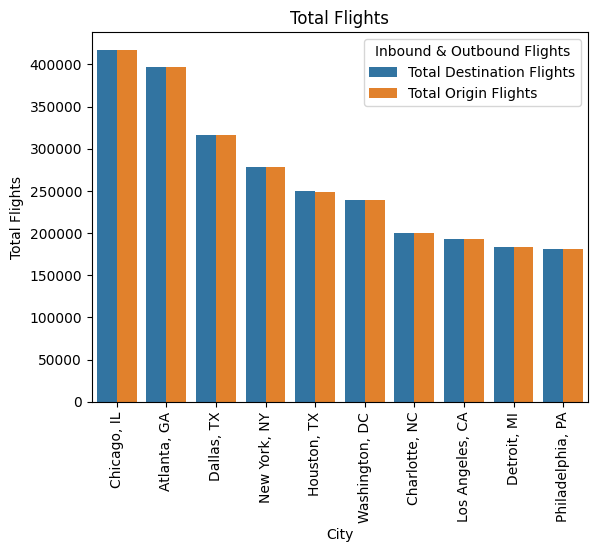

In [24]:
top10_inbound=merge_flights.nlargest(10,'Total Destination Flights')
del top10_inbound['Rank_x']
del top10_inbound['Rank_y']
print(top10_inbound)
df_melted = top10_inbound.melt("City",var_name="Inbound & Outbound Flights",value_name="Total Flights")
sns.barplot(x='City',y='Total Flights',hue='Inbound & Outbound Flights',data=df_melted)
plt.xticks(rotation=90)
plt.title('Total Flights')
plt.show()

Part 1:
Reading File

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
ap1=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/airports.dat.txt')
ap1.columns=['Airport_ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz Database Timezone','Type','Source']
print(ap1.head(3))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Airport_ID                          Name         City           Country  \
0           2                Madang Airport       Madang  Papua New Guinea   
1           3  Mount Hagen Kagamuga Airport  Mount Hagen  Papua New Guinea   
2           4                Nadzab Airport       Nadzab  Papua New Guinea   

  IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  MAG  AYMD -5.207080  145.789001        20       10   U   
1  HGU  AYMH -5.826790  144.296005      5388       10   U   
2  LAE  AYNZ -6.569803  146.725977       239       10   U   

   Tz Database Timezone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  


1. Top 20 highest altitude airports in the world. Choose only “type” with “airport”
Output:
airport_id, name, city, country, altitude, rank


In [8]:
df_altitude=ap1[ap1['Type']=='airport']
df_altitude['Rank']=df_altitude['Altitude'].rank(ascending=False)
top20_altitude=df_altitude.nlargest(20,'Altitude')
print(top20_altitude[['Airport_ID','Name','City','Country','Altitude','Rank']])


      Airport_ID                                    Name         City  \
6541        9310                 Daocheng Yading Airport     Daocheng   
5027        6396                    Qamdo Bangda Airport       Bangda   
6392        8921                        Kangding Airport     Kangding   
5871        7932                     Ngari Gunsa Airport    Shiquanhe   
2624        2762           El Alto International Airport       La Paz   
2626        2764           Capitan Nicolas Rojas Airport       Potosi   
5850        7894                    Yushu Batang Airport        Yushu   
6419        8969                      Copacabana Airport   Copacabana   
2653        2792  Inca Manco Capac International Airport      Juliaca   
7537       13483                     Golog Maqin Airport        Golog   
5777        7766                      Syangboche Airport   Syangboche   
2625        2763                    Juan Mendoza Airport        Oruro   
3873        4097                   Lhasa Gonggar Ai

2. Top 20 countries that have the highest total # of airports.
Output:
country, total_airports, rank


In [10]:
num_airport=df_altitude.groupby (['Country'])['Name'].count().to_frame('TotalAirports').sort_values(by='TotalAirports',ascending=False).reset_index()
num_airport['Rank']=num_airport['TotalAirports'].rank(ascending=False)
print(tabulate(num_airport.head(20),headers=['Country','Total Airports','Rank'],tablefmt='grid'))


+----+----------------+------------------+--------+
|    | Country        |   Total Airports |   Rank |
+====+================+==================+========+
|  0 | United States  |             1512 |    1   |
+----+----------------+------------------+--------+
|  1 | Canada         |              430 |    2   |
+----+----------------+------------------+--------+
|  2 | Australia      |              334 |    3   |
+----+----------------+------------------+--------+
|  3 | Russia         |              264 |    4.5 |
+----+----------------+------------------+--------+
|  4 | Brazil         |              264 |    4.5 |
+----+----------------+------------------+--------+
|  5 | Germany        |              249 |    6   |
+----+----------------+------------------+--------+
|  6 | China          |              241 |    7   |
+----+----------------+------------------+--------+
|  7 | France         |              217 |    8   |
+----+----------------+------------------+--------+
|  8 | Unite

3. Top 20 cities that have the highest total # of airports. (Two cities from different countries can have the same name, and you have to make sure the numbers are not messed up due to that!)
Output:
city, total_airports, rank


In [20]:
city_airport2=df_altitude.groupby (['City'])['Name'].count().to_frame('TotalAirports').sort_values(by='TotalAirports',ascending=False).reset_index()
city_airport2['Rank']=city_airport2['TotalAirports'].rank(method='dense',ascending=False)# dense method in rank() will not skip any rank if there is tie between numbers.
print(tabulate(city_airport2.head(20),headers=['City','Total Airports','Rank'],tablefmt='grid'))
#print(city_airport2.nlargest(20,'TotalAirports'))


+----+--------------+------------------+--------+
|    | City         |   Total Airports |   Rank |
+====+==============+==================+========+
|  0 | London       |                9 |      1 |
+----+--------------+------------------+--------+
|  1 | Columbus     |                8 |      2 |
+----+--------------+------------------+--------+
|  2 | Georgetown   |                7 |      3 |
+----+--------------+------------------+--------+
|  3 | San Jose     |                7 |      3 |
+----+--------------+------------------+--------+
|  4 | Houston      |                6 |      4 |
+----+--------------+------------------+--------+
|  5 | New York     |                6 |      4 |
+----+--------------+------------------+--------+
|  6 | Moscow       |                6 |      4 |
+----+--------------+------------------+--------+
|  7 | Alexandria   |                6 |      4 |
+----+--------------+------------------+--------+
|  8 | Jacksonville |                6 |      4 |


4. Pair of cities that have the same name, but from two different countries.
(hint: Use self join with query in Python (slack example))
Output:
city_a, country_a, city_b, country_b
